# Estimating Palantir and DPT pseudotime for pan fetal reference DN onwards

In [ ]:
import palantir

# Plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scanpy as sc
import numpy as np
import warnings
import anndata
import pandas as pd
import numpy as np
# Inline plotting
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['image.cmap'] = 'Spectral_r'
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

In [2]:
palantir.__version__

'1.3.1'

In [3]:
input_dir ='../GOOGLE_DRIVE_MxOUNT/G2G_Analysis/G2G_paper_related/'
adata_ref = anndata.read_h5ad(input_dir+'PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot.h5ad')

In [4]:
adata = adata_ref.copy() 

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


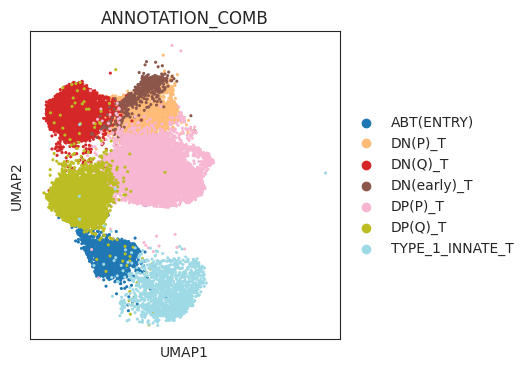

In [5]:
sc.pl.embedding(adata , basis='umap', color='ANNOTATION_COMB', s=20 )

adata.obs['clusters'] = adata.obs.ANNOTATION_COMB

In [6]:
adata.X = adata.layers['counts']

In [7]:
adata.X.data

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [8]:
adata_original = adata.copy()

In [9]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, 10000) 
sc.pp.log1p(adata)
sc.pp.pca(adata)

In [10]:
adata.X.data

array([1.6568332 , 1.6568332 , 1.6568332 , ..., 0.95758396, 0.95758396,
       0.95758396], dtype=float32)

In [11]:
adata_original.X.data

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [12]:
#sc.tl.score_genes(adata, gene_list=['LGR5', 'ASCL2', 'RGMB', 'OLFM4'] , score_name='start_score')
#sc.pl.embedding(adata , basis='umap_scvi', color=['level_3_annot','start_score'], s=20 )

In [13]:
# same as used for monocle and slingshot
start_cell_id =7976  # np.argmax(adata.obs.start_score)
start_cell =  adata.obs_names[start_cell_id] 
start_cell_id 

7976

In [14]:
start_cell

'FCAImmP7579231-GGATGTTCAATGAATG'

In [15]:
adata[adata.obs_names == start_cell].obs.ANNOTATION_COMB

FCAImmP7579231-GGATGTTCAATGAATG    DN(early)_T
Name: ANNOTATION_COMB, dtype: category
Categories (1, object): ['DN(early)_T']

In [16]:
adata

AnnData object with n_obs × n_vars = 18436 × 17718
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts', 'refined_time', 'bin_ids', 'monocle_pseudotime', 'slingshot_pseudotime', 'clusters'
    var: 'n_cells'
    uns: 'ANNOTATION_COMB_colors', 'log1p', 'pca'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [17]:
np.random.seed(5)
# Run diffusion maps
palantir.utils.run_diffusion_maps(adata, pca_key = 'X_scVI')
ms_data = palantir.utils.determine_multiscale_space(adata)
ms_data
#ms_data.index = adata.obs_names

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,0,1,2,3,4,5
FCAImmP7277556-TGATTTCGTTTCGCTC,1.009114,-0.067732,0.014801,0.150055,-0.053164,-0.010745
FCAImmP7292034-ACTTACTAGTTGTCGT,1.072003,-0.071980,0.062866,0.324811,-0.120705,-0.028513
FCAImmP7528283-TATCAGGAGCCATCGC,0.745234,-0.070555,0.225080,0.276386,-0.012640,-0.015404
FCAImmP7277556-GAAACTCAGTGAACGC,1.093210,-0.080324,0.205188,0.500974,-0.122685,-0.021070
FCAImmP7528294-CGAGAAGCATACCATG,1.249034,-0.129728,0.159481,0.624572,-0.201980,-0.042110
...,...,...,...,...,...,...
FCAImmP7579220-GTCCTCATCAACACTG,1.472232,-0.281943,-0.517248,-0.450305,0.044838,0.010046
FCA_gut8015061-GCGGGTTCAGATGAGC,1.408085,-0.257499,-0.437019,-0.383617,0.047842,0.011733
FCAImmP7803021-CAAGGCCCAAGTTAAG,1.417514,-0.266009,-0.435719,-0.341910,0.032141,0.001015
FCAImmP7803021-CGGACACCAGCTGTAT,1.337475,-0.225233,-0.349002,-0.173887,-0.022481,-0.010593


In [18]:
start_cell_id

7976

In [19]:
start_cell

'FCAImmP7579231-GGATGTTCAATGAATG'

In [20]:
np.random.seed(5)
pr_res = palantir.core.run_palantir(ms_data, early_cell=start_cell , use_early_cell_as_start=True, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.013657319545745849 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.27874557971954345 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9984
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


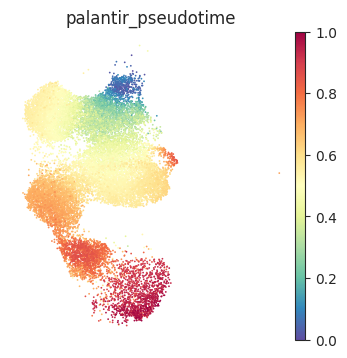

In [21]:
#pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]
palantir_pseudotime = []
for c in adata.obs_names:
    palantir_pseudotime.append(pr_res.pseudotime[c])
adata.obs['palantir_pseudotime'] = palantir_pseudotime
#sc.pl.embedding(adata, basis='umap_scvi', color='palantir_pseudotime', save='Palantir_pseudotime_umap_scvi.pdf', frameon=False)
sc.pl.embedding(adata, basis='umap', color='palantir_pseudotime', frameon=False)

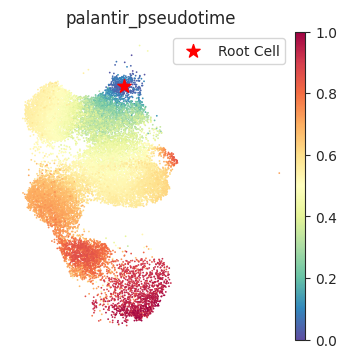

In [22]:
sc.pl.embedding(adata, basis='umap', color=['palantir_pseudotime'], show=False, frameon=False)
single_cell_umap_coords = list(adata.obsm['X_umap'][start_cell_id])  # Replace x and y with actual UMAP coordinates
plt.scatter(single_cell_umap_coords[0], single_cell_umap_coords[1], color='red', marker='*', s=100, label='Root Cell')
plt.legend()
#plt.savefig('ztest.pdf')


In [23]:
np.where(adata.obs.palantir_pseudotime ==  np.min(adata.obs.palantir_pseudotime)) 

(array([7976]),)

In [24]:
adata[ start_cell] .obs.ANNOTATION_COMB

FCAImmP7579231-GGATGTTCAATGAATG    DN(early)_T
Name: ANNOTATION_COMB, dtype: category
Categories (1, object): ['DN(early)_T']

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


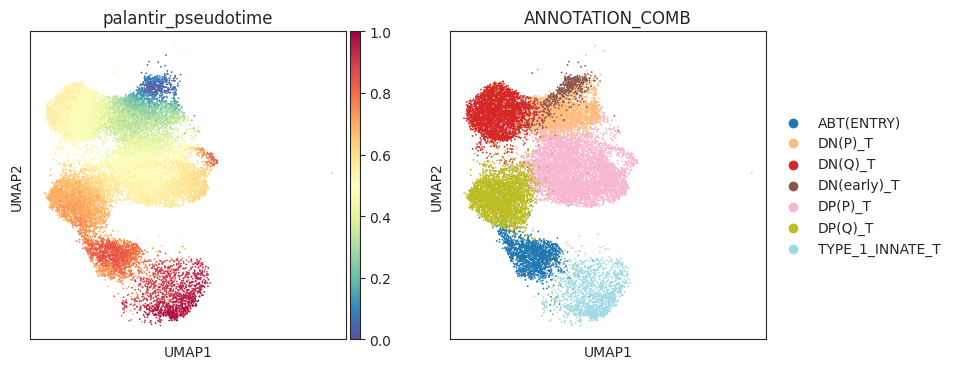

In [25]:
sc.pl.embedding(adata, basis='umap', color=['palantir_pseudotime','ANNOTATION_COMB'])

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


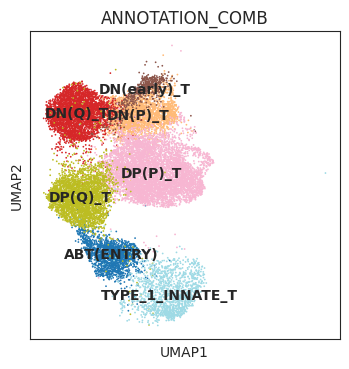

In [26]:
sc.pl.embedding(adata, basis='umap', color=['ANNOTATION_COMB'], legend_loc='on data')

In [29]:
adata_temp = adata.copy()
adata_temp.obsm['X_umap'] = adata_temp.obsm['X_umap']

In [30]:
adata_ref.obs['palantir_pseudotime'] = adata.obs['palantir_pseudotime']

In [31]:
adata_ref

AnnData object with n_obs × n_vars = 18436 × 17718
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts', 'refined_time', 'bin_ids', 'monocle_pseudotime', 'slingshot_pseudotime', 'palantir_pseudotime'
    var: 'n_cells'
    uns: 'ANNOTATION_COMB_colors', 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


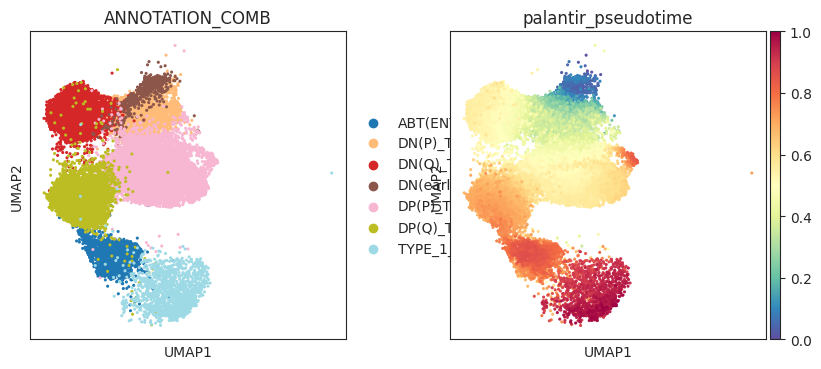

In [32]:
sc.pl.embedding(adata_ref , basis='umap', color= ['ANNOTATION_COMB', 'palantir_pseudotime'], s=20 )

In [45]:
input_dir

'../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/'

In [33]:
adata_ref.write_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot_palantir.h5ad')

# DPT pseudotime 

In [2]:
import palantir

# Plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scanpy as sc
import numpy as np
import warnings
import anndata
import pandas as pd
import numpy as np
# Inline plotting
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['image.cmap'] = 'Spectral_r'
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

palantir.__version__


'1.3.1'

In [14]:
input_dir ='../GOOGLE_DRIVE_MOUNT/G2G_Analysis/G2G_paper_related/Revision/'
adata_ref = anndata.read_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot_palantir.h5ad')
adata = adata_ref.copy() 

In [15]:
adata.X.data

array([1.6558038, 1.6558038, 1.6558038, ..., 0.9572873, 0.9572873,
       0.9572873], dtype=float32)

In [6]:
#adata.X = adata.layers['counts']

In [23]:
adata

AnnData object with n_obs × n_vars = 18436 × 17718
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts', 'refined_time', 'bin_ids', 'monocle_pseudotime', 'slingshot_pseudotime', 'palantir_pseudotime'
    var: 'n_cells'
    uns: 'ANNOTATION_COMB_colors', 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

====== DPT RUN ====== 
         Falling back to preprocessing with `sc.pp.pca` and default params.
7976


/tmp/ipykernel_15426/3049436308.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_sub.obs['rootcell'][rootcell] = 1


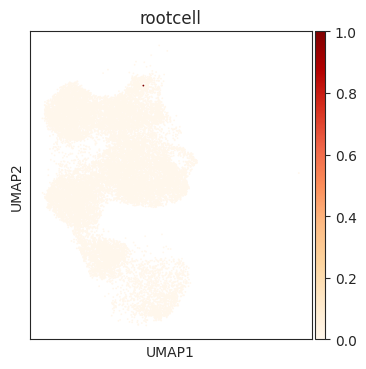

In [24]:
def estimate_dpt_pseudotime(adata_WT,ANNO_COLNAME):
    print('====== DPT RUN ====== ')
    #sc.pp.normalize_per_cell(adata_WT, 10000) 
    #sc.pp.log1p(adata_WT)
    sc.pp.highly_variable_genes(adata_WT, n_top_genes=4000)
    adata_WT.raw = adata_WT.copy()
    adata_WT = adata_WT[:, adata_WT.var.highly_variable]
    sc.pp.neighbors(adata_WT)
    #sc.tl.umap(adata_WT)
    #sc.tl.leiden(adata_WT, key_added='leiden_normal', resolution=0.1)
    ref_sub = adata_WT.copy()
    sc.pp.neighbors(ref_sub,use_rep='X_scVI')
    sc.tl.diffmap(ref_sub)
    sc.pp.neighbors(ref_sub,use_rep='X_diffmap')
    sc.tl.leiden(ref_sub, key_added='leiden_diffmap', resolution=0.1)
    
    rootcell = 7976# np.argmax(ref_sub.obs.dpt_start_score)
    
    print(rootcell)
    ref_sub.uns['iroot'] = rootcell
    ref_sub.obs['rootcell'] = 0
    ref_sub.obs['rootcell'][rootcell] = 1
    sc.pl.umap(ref_sub,color='rootcell',color_map='OrRd')
    sc.tl.dpt(ref_sub)
    return ref_sub



temp = estimate_dpt_pseudotime(adata.copy(), 'ANNOTATION_COMB')

In [9]:
temp

AnnData object with n_obs × n_vars = 18436 × 4000
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts', 'refined_time', 'bin_ids', 'monocle_pseudotime', 'slingshot_pseudotime', 'palantir_pseudotime', 'leiden_normal', 'leiden_diffmap', 'rootcell', 'dpt_pseudotime'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ANNOTATION_COMB_colors', 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'diffmap_evals', 'iroot'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap', 'X_pca', 'X_diffmap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


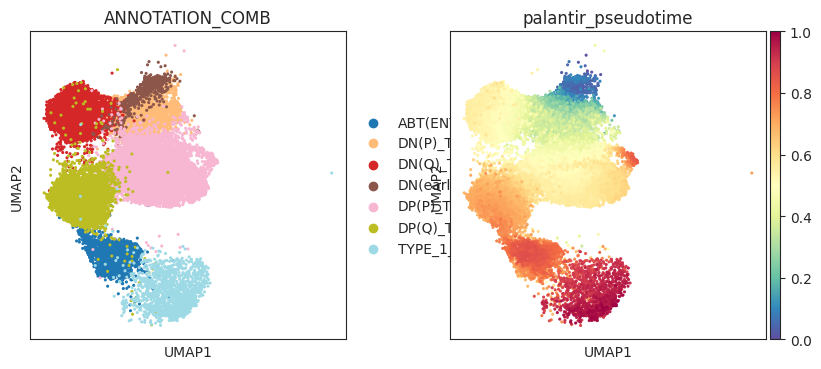

In [16]:
sc.pl.embedding(adata , basis='umap', color= ['ANNOTATION_COMB', 'palantir_pseudotime'], s=20 )

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


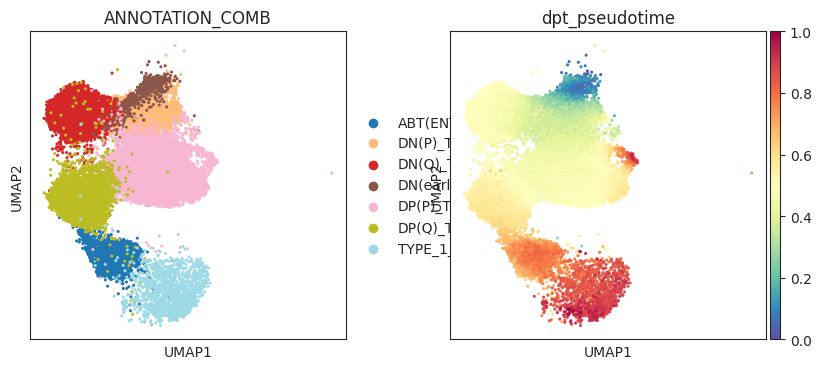

In [25]:
sc.pl.embedding(temp , basis='umap', color= ['ANNOTATION_COMB', 'dpt_pseudotime'], s=20 )

In [28]:
adata_ref.obs['dpt_pseudotime'] = temp.obs['dpt_pseudotime'] 

In [31]:
adata_ref

AnnData object with n_obs × n_vars = 18436 × 17718
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts', 'refined_time', 'bin_ids', 'monocle_pseudotime', 'slingshot_pseudotime', 'palantir_pseudotime', 'dpt_pseudotime'
    var: 'n_cells'
    uns: 'ANNOTATION_COMB_colors', 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [32]:
adata_ref.write_h5ad('revision_data/PanfetalATO_SPT_DNonwards_gplvm_ref_24012023_monocle_slingshot_palantir.h5ad')